# Titanic dataset Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns",999)
pd.set_option("display.max_rows", 999)
import warnings
warnings.simplefilter(action = "ignore")

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [6]:
#total 891 observations, our dependent variable is Survived

In [7]:
#to find null values
null_list = []
null_count = []
null_percen = []
for i in df.columns:
    val = df[i].isnull().sum()
    if  val > 0:
        null_list.append(i)
        null_count.append(val)
        null_percen.append(val/len(df))

In [8]:
null_dic = {"null_columns" : null_list, "null_count" : null_count, "null_percentage" : null_percen}

In [9]:
null_df = pd.DataFrame.from_dict(null_dic)

In [10]:
null_df

null_columns  null_count  null_percentage
0          Age         177         0.198653
1        Cabin         687         0.771044
2     Embarked           2         0.002245

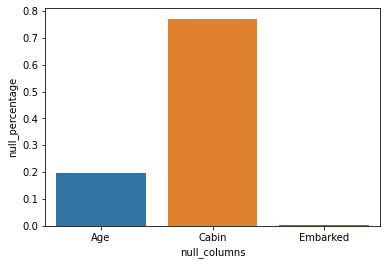

In [11]:
fig = plt.figure()
sns.barplot(x = "null_columns", y = "null_percentage", data = null_df)

plt.show()

In [12]:
#for cabin, we need to replace the nan values with the another category
df["Cabin"] = df['Cabin'].fillna("miss")
#and also take the first letter of the cabin to specify the classes.
cabin_first = df['Cabin'].astype(str).str[0]
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [13]:
cabin_dict = cabin_first.value_counts().to_dict()

In [14]:
cabin_dict

{'m': 687,
 'C': 59,
 'B': 47,
 'D': 33,
 'E': 32,
 'A': 15,
 'F': 13,
 'G': 4,
 'T': 1}

In [15]:
df['Cabin'] = df['Cabin'].map(cabin_dict)

In [16]:
#now focus on age column

In [17]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [18]:
df['Embarked'].value_counts()
#missed values is only two so replace that with Highest count 'S'

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
df['Embarked'] = df['Embarked'].fillna('S')

In [20]:
df.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare  Cabin Embarked  
0      0         A/5 21171   7.2500    687        S  
1      0          PC 17599  71.2833     59        C  
2      0  STON/O2. 3101282   7.9250    687        S

In [21]:
#name and ticket is not required
df.drop(['Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)

In [22]:
df.head(5)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare  Cabin Embarked
0         0       3    male  22.0      1      0   7.2500    687        S
1         1       1  female  38.0      1      0  71.2833     59        C
2         1       3  female  26.0      0      0   7.9250    687        S
3         1       1  female  35.0      1      0  53.1000     59        S
4         0       3    male  35.0      0      0   8.0500    687        S

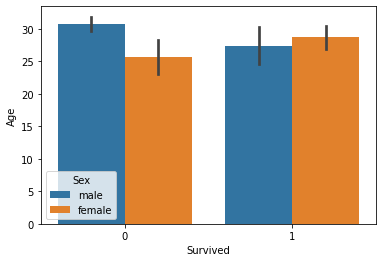

In [23]:
sns.barplot(y = 'Age', x = 'Survived', hue = 'Sex', data = df)

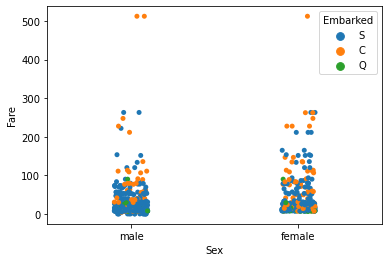

In [24]:
# more female are survived than male
sns.stripplot(x = "Sex", y = "Fare", hue = "Embarked", data = df)

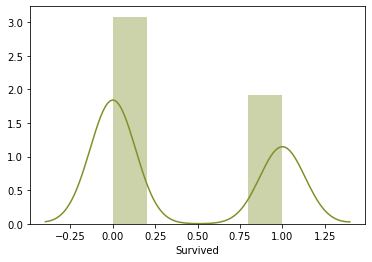

<Figure size 432x288 with 0 Axes>

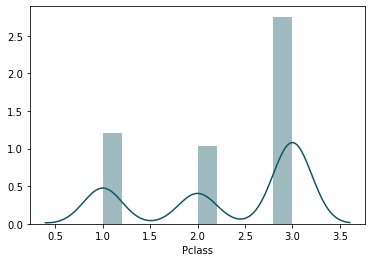

<Figure size 432x288 with 0 Axes>

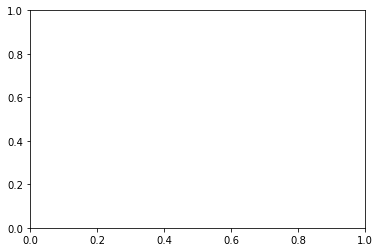

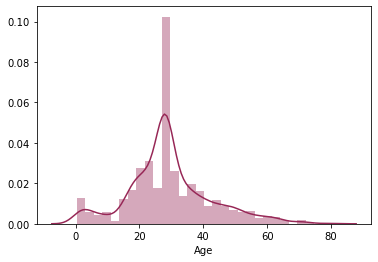

<Figure size 432x288 with 0 Axes>

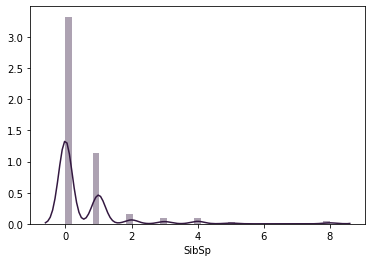

<Figure size 432x288 with 0 Axes>

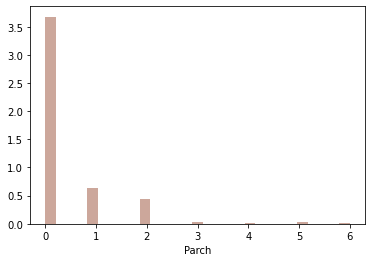

<Figure size 432x288 with 0 Axes>

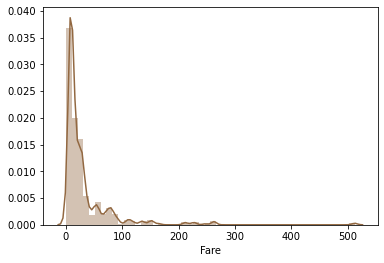

<Figure size 432x288 with 0 Axes>

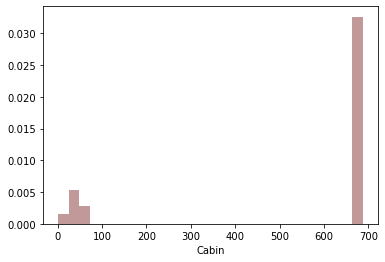

<Figure size 432x288 with 0 Axes>

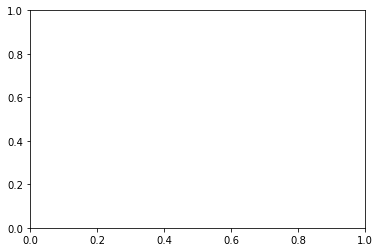

In [25]:
for i in df.columns:
    try:
        plt.figure()
        colors = "#" + str(np.random.randint(100000,999999))
        sns.distplot(df[i], color = colors)
        plt.figure()
    except:
        pass

In [26]:
sex = pd.get_dummies(df['Sex'], drop_first = True)
embarked = pd.get_dummies(df['Embarked'], drop_first = True)

In [27]:
df.drop(['Sex', 'Embarked'],axis = 1, inplace = True)

In [28]:
df = pd.concat([df, sex, embarked], axis = 1)

In [29]:
df.head(1)

Survived  Pclass   Age  SibSp  Parch  Fare  Cabin  male  Q  S
0         0       3  22.0      1      0  7.25    687     1  0  1

In [30]:
Y = df[['Survived']]
df.drop('Survived', axis = 1, inplace = True)
X= df

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_X = scaler.fit_transform(X)

In [32]:
X = pd.DataFrame(scale_X, columns = X.columns)
X.head(5)

Pclass       Age  SibSp  Parch      Fare     Cabin  male    Q    S
0     1.0  0.271174  0.125    0.0  0.014151  1.000000   1.0  0.0  1.0
1     0.0  0.472229  0.125    0.0  0.139136  0.084548   0.0  0.0  0.0
2     1.0  0.321438  0.000    0.0  0.015469  1.000000   0.0  0.0  1.0
3     0.0  0.434531  0.125    0.0  0.103644  0.084548   0.0  0.0  1.0
4     1.0  0.434531  0.000    0.0  0.015713  1.000000   1.0  0.0  1.0

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
x_train, x_test, y_train,y_test = train_test_split(X,Y, test_size = 0.3)

In [35]:
#for logisticregression
LOR = LogisticRegression()
LOR.fit(x_train,y_train)
y_pred = LOR.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.8022388059701493
[[134  27]
 [ 26  81]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       161
           1       0.75      0.76      0.75       107

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [36]:
#for randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.8059701492537313
[[134  26]
 [ 26  82]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       160
           1       0.76      0.76      0.76       108

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [47]:
1e-4

0.0001

In [55]:
params = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'C': [0.2,0.5,0.7,1.0,1,4,1,5],
    'class_weight': [None,1,2,3,4,5,8],
    'solver' : ['liblinear', 'newton-cg', 'lbfgs'],
    'max_iter' : np.linspace(0,501,50),
    'l1_ratio' : [0.2,0.4,0.6,0.8,1]
}

In [37]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [57]:
m1_rn = RandomizedSearchCV(LOR, param_distributions = params, n_jobs = -1, verbose = 3, n_iter = 100, cv = 5, random_state = 0)

In [58]:
m1_rn.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.2, 0.5, 0.7, 1.0, 1, 4, 1, 5],
                                        'class_weight': [None, 1, 2, 3, 4, 5,
                                                         8],
                                        'l1_ratio': [0.2, 0.4, 0.6, 0.8, 1],
                                        'max_iter': array([  0.        ,  10.2244898 ,  20.44897959,  30.67346939,
        40.89795918,  51.12244898,  61.34693878,  71.57142857,
        81.79591837,  92.02040816, 102.24489796, 112.46938776,
       122....
       286.28571429, 296.51020408, 306.73469388, 316.95918367,
       327.18367347, 337.40816327, 347.63265306, 357.85714286,
       368.08163265, 378.30612245, 388.53061224, 398.75510204,
       408.97959184, 419.20408163, 429.42857143, 439.65306122,
       449.87755102, 460.10204082, 470.32653061, 480.55102041,
       490.7755102 , 501.        ]),
                 

In [59]:
m1_rn.best_params_

{'solver': 'newton-cg',
 'penalty': 'l2',
 'max_iter': 347.6326530612245,
 'l1_ratio': 0.2,
 'class_weight': 1,
 'C': 5}

In [66]:
params = { 'C': [0,0.2,0.3],
    'class_weight': [None,1,2],
    'solver' : ['newton-cg', 'lbfgs'],
    'max_iter' : [300,340,380],
    'l1_ratio' : [0,0.1,0.2,0.3],
        'penalty' : ["l2"]
         }

In [67]:
m2_grid = GridSearchCV(LOR, param_grid = params, n_jobs = -1, cv = 4, verbose = 4)

In [68]:
m2_grid.fit(x_train,y_train)

Fitting 4 folds for each of 216 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:    3.2s finished


GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0, 0.2, 0.3], 'class_weight': [None, 1, 2],
                         'l1_ratio': [0, 0.1, 0.2, 0.3],
                         'max_iter': [300, 340, 380], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs']},
             verbose=4)

In [69]:
m2_grid.best_estimator_

LogisticRegression(C=0.2, l1_ratio=0, max_iter=300, solver='newton-cg')

In [70]:
m2_grid.best_params_

{'C': 0.2,
 'class_weight': None,
 'l1_ratio': 0,
 'max_iter': 300,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [72]:
m3_lor = LogisticRegression(C= 0.2,
 class_weight= None,
 l1_ratio= 0,
 max_iter= 300,
 penalty= 'l2',
 solver='newton-cg')

In [73]:
m3_lor.fit(x_train,y_train)

LogisticRegression(C=0.2, l1_ratio=0, max_iter=300, solver='newton-cg')

In [74]:
y_pred = m3_lor.predict(x_test)

In [75]:
print(accuracy_score(y_pred,y_test))

0.8171641791044776


In [54]:
#perform hyper parameter tuning xgboost
from xgboost import XGBClassifier

In [55]:
xgb = XGBClassifier()

In [78]:
params = {
    "max_depth" : [1,2,3,4,5,6,7,8,9],
    "learning_rate" : [0.005,0.010,0.030,0.070,0.010,0.03,0.05,0.09,0.10,0.20,0.30,0.40,0.50,0.60],
    "booster" : ['gbtree', 'gblinear', 'dart'],
    "gamma" : [0,0.05,0.1,0.2,0.3,0.4,0.5],
    "min_child_weight" : [1,2,3,4,5,6,7],
    "subsample" : [0.2,0.3,0.4,0.5,0.6,0.7],
    "colsample_bytree": [0.1,0.2,0.3,0.4,0.5]
}

In [80]:
m4_xgb = RandomizedSearchCV(xgb, param_distributions = params, n_iter = 200, cv = 5, n_jobs = -1, verbose = 3, random_state = 0)

In [81]:
m4_xgb.fit(x_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 904 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   19.8s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'colsa

In [89]:
m4_xgb.best_params_

{'subsample': 0.7,
 'min_child_weight': 4,
 'max_depth': 7,
 'learning_rate': 0.09,
 'gamma': 0,
 'colsample_bytree': 0.5,
 'booster': 'dart'}

In [84]:
y_pred = m4_xgb.predict(x_test)
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[150  24]
 [ 16  78]]
0.8507462686567164
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       174
           1       0.76      0.83      0.80        94

    accuracy                           0.85       268
   macro avg       0.83      0.85      0.84       268
weighted avg       0.85      0.85      0.85       268



In [90]:
params = {
    "max_depth" : [6,7,8,9],
    "learning_rate" : [0.08,0.07,.09,0.10,0.11],
    "booster" : ['dart'],
    "gamma" : [0,0.09,0.02],
    "min_child_weight" : [3,4,5],
    "subsample" : [0.6,0.7,0.8,0.9],
    "colsample_bytree": [0.4,0.5,0.6,0.7]
}

In [92]:
m5_grid = GridSearchCV(xgb, param_grid = params, n_jobs = -1, cv = 4,verbose = 3)

In [93]:
m5_grid.fit(x_train,y_train)

Fitting 4 folds for each of 2880 candidates, totalling 11520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
  

In [94]:
y_pred = m5_grid.predict(x_test)
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[150  22]
 [ 16  80]]
0.8582089552238806
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       172
           1       0.78      0.83      0.81        96

    accuracy                           0.86       268
   macro avg       0.84      0.85      0.85       268
weighted avg       0.86      0.86      0.86       268



In [95]:
m5_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.09, max_delta_step=0, max_depth=9,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
test_data = pd.read_csv("test.csv")

In [39]:
test_data.drop(['PassengerId', 'Ticket', 'Name'], axis = 1, inplace = True)

In [40]:
test_data.head(5)

Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0       3    male  34.5      0      0   7.8292   NaN        Q
1       3  female  47.0      1      0   7.0000   NaN        S
2       2    male  62.0      0      0   9.6875   NaN        Q
3       3    male  27.0      0      0   8.6625   NaN        S
4       3  female  22.0      1      1  12.2875   NaN        S

In [41]:
#to find null values
null_list = []
null_count = []
null_percen = []
for i in test_data.columns:
    val = test_data[i].isnull().sum()
    if  val > 0:
        null_list.append(i)
        null_count.append(val)
        null_percen.append(val/len(df))

In [42]:
null_list

['Age', 'Fare', 'Cabin']

In [43]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [44]:
test_data['Cabin'] = test_data['Cabin'].fillna('miss')

In [45]:
test_data['Cabin'] = test_data['Cabin'].astype(str).str[0]

In [46]:
cabin_dict = test_data['Cabin'].value_counts().to_dict()

In [47]:
test_data['Cabin'] = test_data['Cabin'].map(cabin_dict)

In [48]:
test_data.head()

Pclass     Sex   Age  SibSp  Parch     Fare  Cabin Embarked
0       3    male  34.5      0      0   7.8292    327        Q
1       3  female  47.0      1      0   7.0000    327        S
2       2    male  62.0      0      0   9.6875    327        Q
3       3    male  27.0      0      0   8.6625    327        S
4       3  female  22.0      1      1  12.2875    327        S

In [49]:
sex = pd.get_dummies(test_data['Sex'], drop_first = True)
embarked = pd.get_dummies(test_data['Embarked'], drop_first = True)
test_data.drop(['Sex', 'Embarked'], axis = 1, inplace = True)
test_data = pd.concat([test_data, sex, embarked], axis = 1)

In [51]:
test_data = pd.DataFrame(scaler_t, columns = test_data.columns)

In [52]:
test_data.head()

Pclass       Age  SibSp     Parch      Fare  Cabin  male    Q    S
0     1.0  0.452723  0.000  0.000000  0.015282    1.0   1.0  1.0  0.0
1     1.0  0.617566  0.125  0.000000  0.013663    1.0   0.0  0.0  1.0
2     0.5  0.815377  0.000  0.000000  0.018909    1.0   1.0  1.0  0.0
3     1.0  0.353818  0.000  0.000000  0.016908    1.0   1.0  0.0  1.0
4     1.0  0.287881  0.125  0.111111  0.023984    1.0   0.0  0.0  1.0

In [71]:
# fitting the train data with the best model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [72]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ("xgb", XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.09, max_delta_step=0, max_depth=9,
              min_child_weight=4, missing=np.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None))
])


In [73]:
pipe.fit(X,Y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='dart',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.7, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.09,
                               max_delta_step=0, max_depth=9,
                               min_child_weight=4, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.7, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [74]:
pipe.predict(test_data)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [77]:
import joblib
joblib.dump(pipe, 'TitanicModel.pkl')

['TitanicModel.pkl']

In [59]:
submission = pd.read_csv("gender_submission.csv")

In [60]:
y_pred = xgb.predict(test_data)
print(confusion_matrix(y_pred,submission['Survived']))
print(accuracy_score(y_pred,submission['Survived']))
print(classification_report(y_pred,submission['Survived']))

[[246  30]
 [ 20 122]]
0.8803827751196173
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       276
           1       0.80      0.86      0.83       142

    accuracy                           0.88       418
   macro avg       0.86      0.88      0.87       418
weighted avg       0.88      0.88      0.88       418



In [61]:
submission['Survived'] = y_pred

In [62]:
submission.to_csv("test_result.csv", index = False)

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [64]:
params = {
    "n_estimators" : [100,200,300,400,500],
    "criterion" : ['entropy', 'gini'],
    "max_depth" : [1,3,5,7,9],
    "min_samples_split" : [1,3,5,6,7,8],
    "min_samples_leaf" : [1,2,3,4],
    "max_leaf_nodes" : [None, 1,2,3,4],

}

In [65]:
model_new1 = RandomizedSearchCV(rfc, param_distributions = params, n_jobs = -1, verbose = 3, n_iter = 300, cv = 4, random_state = 0)

In [204]:
model_new1.fit(X,Y)

Fitting 4 folds for each of 300 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  3.1min finished


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 3, 5, 7, 9],
                                        'max_leaf_nodes': [None, 1, 2, 3, 4],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 3, 5, 6, 7, 8],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=0, verbose=3)

In [66]:
y_pred = xgb.predict(test_data)
print(confusion_matrix(y_pred,submission['Survived']))
print(accuracy_score(y_pred,submission['Survived']))
print(classification_report(y_pred,submission['Survived']))

[[276   0]
 [  0 142]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       276
           1       1.00      1.00      1.00       142

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



In [207]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# gives 100% test accuracy.....

In [208]:
submission['Survived'] = y_pred

In [209]:
submission.to_csv("test_result.csv", index = False)

In [78]:
X

Pclass       Age  SibSp     Parch      Fare     Cabin  male    Q    S
0       1.0  0.271174  0.125  0.000000  0.014151  1.000000   1.0  0.0  1.0
1       0.0  0.472229  0.125  0.000000  0.139136  0.084548   0.0  0.0  0.0
2       1.0  0.321438  0.000  0.000000  0.015469  1.000000   0.0  0.0  1.0
3       0.0  0.434531  0.125  0.000000  0.103644  0.084548   0.0  0.0  1.0
4       1.0  0.434531  0.000  0.000000  0.015713  1.000000   1.0  0.0  1.0
5       1.0  0.346569  0.000  0.000000  0.016510  1.000000   1.0  1.0  0.0
6       0.0  0.673285  0.000  0.000000  0.101229  0.045190   1.0  0.0  1.0
7       1.0  0.019854  0.375  0.166667  0.041136  1.000000   1.0  0.0  1.0
8       1.0  0.334004  0.000  0.333333  0.021731  1.000000   0.0  0.0  1.0
9       0.5  0.170646  0.125  0.000000  0.058694  1.000000   0.0  0.0  0.0
10      1.0  0.044986  0.125  0.166667  0.032596  0.004373   0.0  0.0  1.0
11      0.0  0.723549  0.000  0.000000  0.051822  0.084548   0.0  0.0  1.0
12      1.0  0.246042  0.000  0.000000  0.015713  1.000000   1.0  0.0  1.0
13      1.0  0.484795  0.125  0.833333  0.061045  1.000000   1.0  0.0  1.0
14      1.0  0.170646  0.000  0.000000  0.015330  1.000000   0.0  0.0  1.0
15      0.5  0.685851  0.000  0.000000  0.031230  1.000000   0.0  0.0  1.0
16      1.0  0.019854  0.500  0.166667  0.056848  1.000000   1.0  1.0  0.0
17      0.5  0.346569  0.000  0.000000  0.025374  1.000000   1.0  0.0  1.0
18      1.0  0.384267  0.125  0.000000  0.035134  1.000000   0.0  0.0  1.0
19      1.0  0.346569  0.000  0.000000  0.014102  1.000000   0.0  0.0  0.0
20      0.5  0.434531  0.000  0.000000  0.050749  1.000000   1.0  0.0  1.0
21      0.5  0.421965  0.000  0.000000  0.025374  0.046647   1.0  0.0  1.0
22      1.0  0.183212  0.000  0.000000  0.015672  1.000000   0.0  1.0  0.0
23      0.0  0.346569  0.000  0.000000  0.069291  0.020408   1.0  0.0  1.0
24      1.0  0.095250  0.375  0.166667  0.041136  1.000000   0.0  0.0  1.0
25      1.0  0.472229  0.125  0.833333  0.061264  1.000000   0.0  0.0  1.0
26      1.0  0.346569  0.000  0.000000  0.014102  1.000000   1.0  0.0  0.0
27      0.0  0.233476  0.375  0.333333  0.513342  0.084548   1.0  0.0  1.0
28      1.0  0.346569  0.000  0.000000  0.015379  1.000000   0.0  1.0  0.0
29      1.0  0.346569  0.000  0.000000  0.015412  1.000000   1.0  0.0  1.0
30      0.0  0.497361  0.000  0.000000  0.054107  1.000000   1.0  0.0  0.0
31      0.0  0.346569  0.125  0.000000  0.285990  0.067055   0.0  0.0  0.0
32      1.0  0.346569  0.000  0.000000  0.015127  1.000000   0.0  1.0  0.0
33      0.5  0.824076  0.000  0.000000  0.020495  1.000000   1.0  0.0  1.0
34      0.0  0.346569  0.125  0.000000  0.160387  1.000000   1.0  0.0  0.0
35      0.0  0.522493  0.125  0.000000  0.101497  1.000000   1.0  0.0  1.0
36      1.0  0.346569  0.000  0.000000  0.014110  1.000000   1.0  0.0  0.0
37      1.0  0.258608  0.000  0.000000  0.015713  1.000000   1.0  0.0  1.0
38      1.0  0.220910  0.250  0.000000  0.035134  1.000000   0.0  0.0  1.0
39      1.0  0.170646  0.125  0.000000  0.021942  1.000000   0.0  0.0  0.0
40      1.0  0.497361  0.125  0.000000  0.018494  1.000000   0.0  0.0  1.0
41      0.5  0.334004  0.125  0.000000  0.040989  1.000000   0.0  0.0  1.0
42      1.0  0.346569  0.000  0.000000  0.015412  1.000000   1.0  0.0  0.0
43      0.5  0.032420  0.125  0.333333  0.081157  1.000000   0.0  0.0  0.0
44      1.0  0.233476  0.000  0.000000  0.015379  1.000000   0.0  1.0  0.0
45      1.0  0.346569  0.000  0.000000  0.015713  1.000000   1.0  0.0  1.0
46      1.0  0.346569  0.125  0.000000  0.030254  1.000000   1.0  1.0  0.0
47      1.0  0.346569  0.000  0.000000  0.015127  1.000000   0.0  1.0  0.0
48      1.0  0.346569  0.250  0.000000  0.042315  1.000000   1.0  0.0  0.0
49      1.0  0.220910  0.125  0.000000  0.034743  1.000000   0.0  0.0  1.0
50      1.0  0.082684  0.500  0.166667  0.077465  1.000000   1.0  0.0  1.0
51      1.0  0.258608  0.000  0.000000  0.015225  1.000000   1.0  0.0  1.0
52      0.0  0.610455  0.125  